In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("/content/penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
df.shape

(344, 7)

In [4]:
df['island'].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [5]:
df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [20]:
df['sex'].value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Uni-variate Analysis

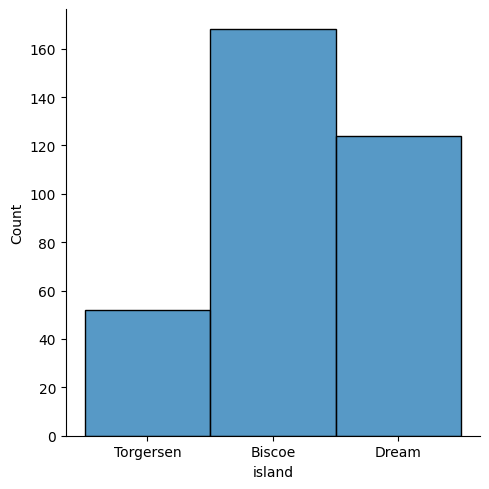

In [9]:
sns.displot(df['island'])

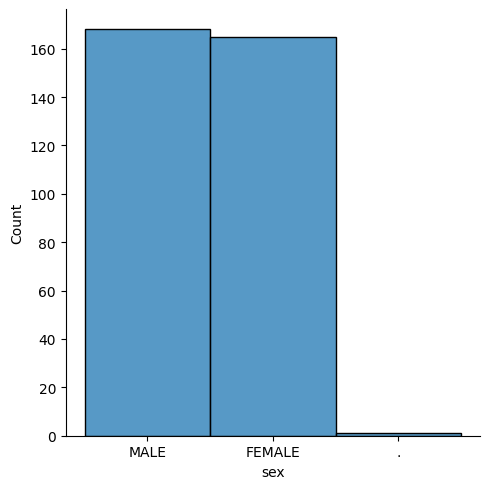

In [19]:
sns.displot(df['sex'])

Text(0.5, 1.0, 'Island')

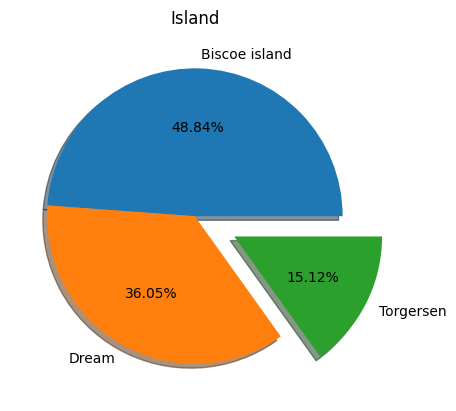

In [17]:
plt.pie(df.island.value_counts(),[0,0,0.3],autopct="%1.2f%%",labels=['Biscoe island','Dream',"Torgersen"],shadow=True)
plt.title("Island")

<Axes: ylabel='species'>

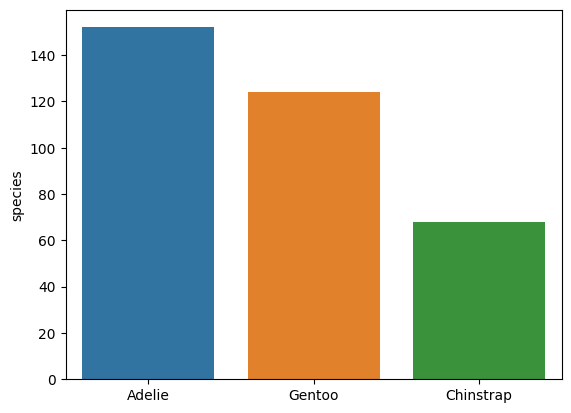

In [21]:
sns.barplot(x=df.species.value_counts().index,y=df.species.value_counts())

# Bi-variate Analysis

<Axes: xlabel='island', ylabel='species'>

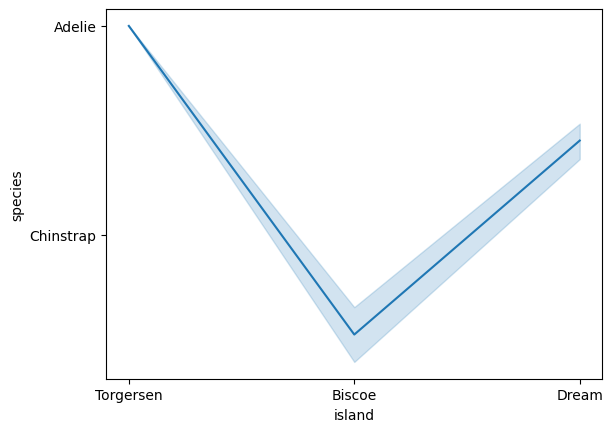

In [24]:
sns.lineplot(x=df['island'],y=df['species'])

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

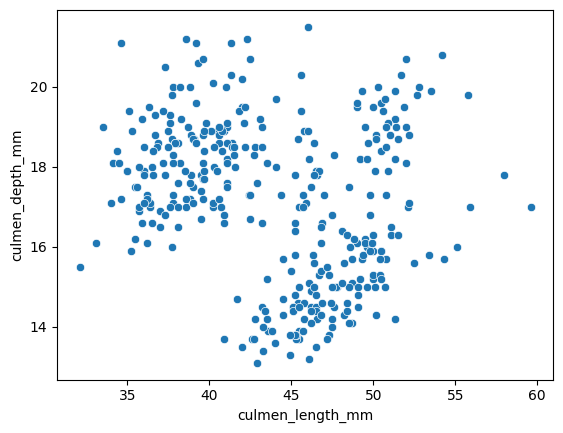

In [25]:
sns.scatterplot(x=df['culmen_length_mm'],y=df['culmen_depth_mm'])

# Multi-variate Analysis

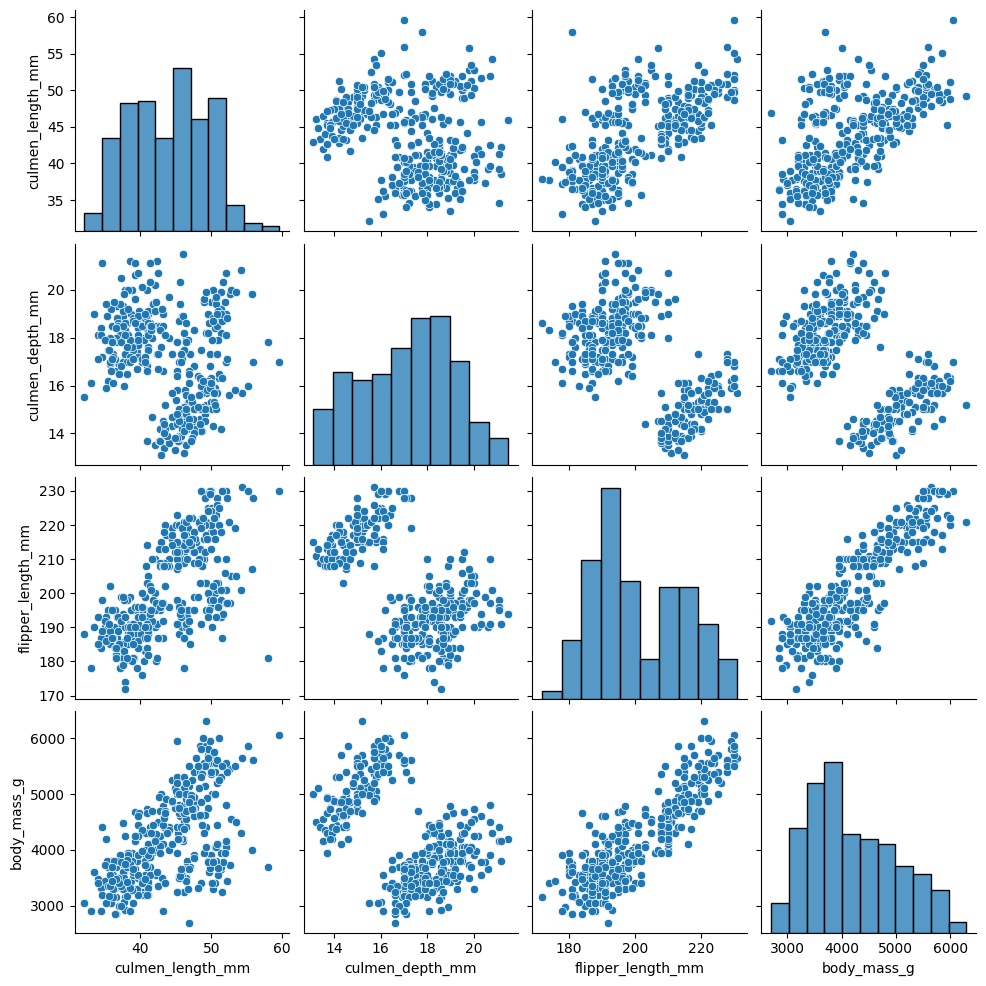

In [27]:
sns.pairplot(df)

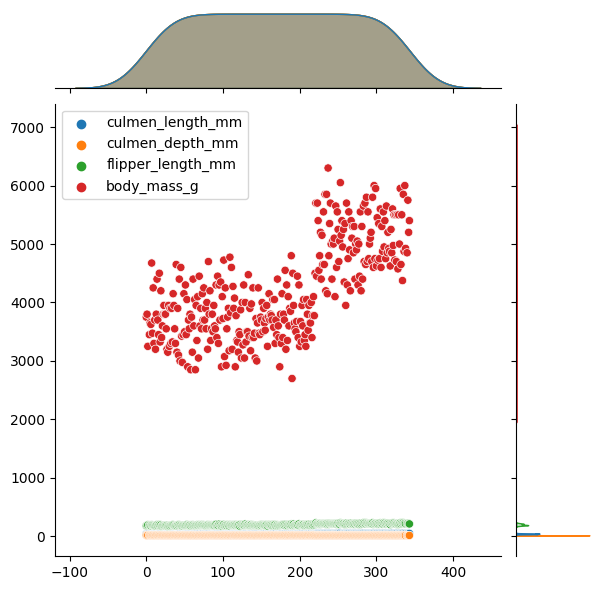

In [28]:
sns.jointplot(df)

<Axes: >

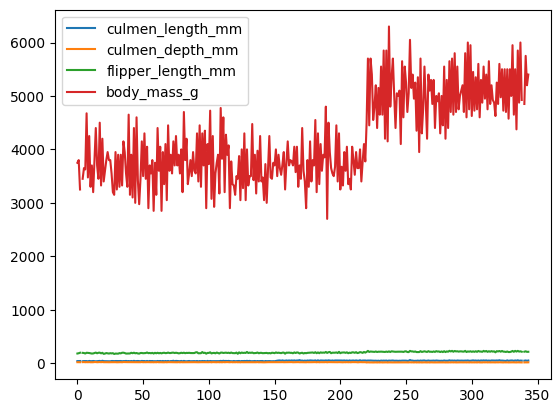

In [29]:
df.plot()

In [30]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [32]:
df.isnull().any()

species              False
island               False
culmen_length_mm      True
culmen_depth_mm       True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

In [33]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

# Encoding

In [34]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [35]:
df['sex']=LE.fit_transform(df['sex'])
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,3
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1


In [37]:
df.fillna(df.mean(),inplace=True)
df.head()

<ipython-input-37-918818d888db>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(),inplace=True)


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,2
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,1
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,1
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,3
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,1


# One-hot Encoding

In [39]:
df1=pd.get_dummies(df,columns=['island','species'])
df1.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,island_Biscoe,island_Dream,island_Torgersen,species_Adelie,species_Chinstrap,species_Gentoo
0,39.10000,18.70000,181.000000,3750.000000,2,0,0,1,1,0,0
1,39.50000,17.40000,186.000000,3800.000000,1,0,0,1,1,0,0
2,40.30000,18.00000,195.000000,3250.000000,1,0,0,1,1,0,0
3,43.92193,17.15117,200.915205,4201.754386,3,0,0,1,1,0,0
4,36.70000,19.30000,193.000000,3450.000000,1,0,0,1,1,0,0


<Axes: >

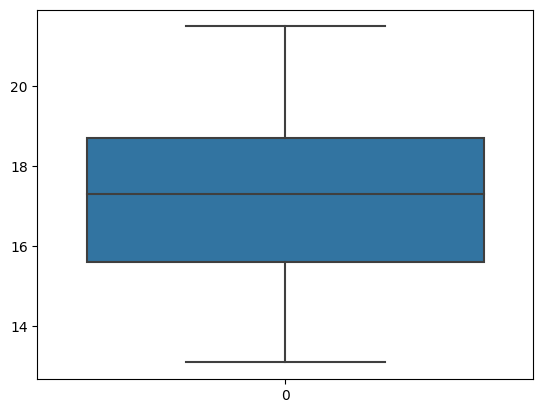

In [40]:
sns.boxplot(df['culmen_depth_mm'])

<Axes: >

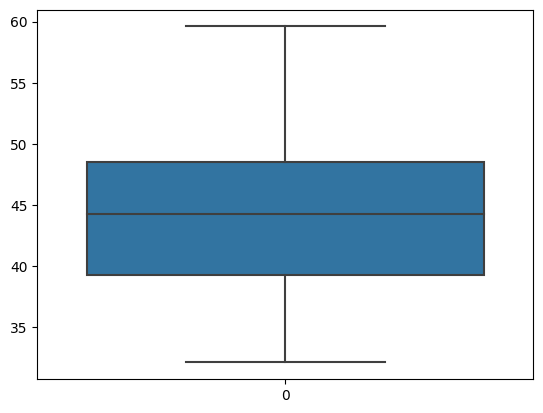

In [42]:
sns.boxplot(df['culmen_length_mm'])

In [43]:
# correlation of independent variables

df1.corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,island_Biscoe,island_Dream,island_Torgersen,species_Adelie,species_Chinstrap,species_Gentoo
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110,0.264024,0.238622,0.033950,-0.378494,-0.834277,0.448530,0.490869
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916,0.316379,-0.630442,0.455604,0.269073,0.537305,0.320468,-0.821550
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202,0.193476,0.609855,-0.420557,-0.287321,-0.692055,-0.180520,0.865530
body_mass_g,0.595110,-0.471916,0.871202,1.000000,0.340402,0.625523,-0.459651,-0.256785,-0.554721,-0.291351,0.815411
sex,0.264024,0.316379,0.193476,0.340402,1.000000,-0.013800,-0.036926,0.068753,0.024857,-0.038745,0.006427
island_Biscoe,0.238622,-0.630442,0.609855,0.625523,-0.013800,1.000000,-0.733496,-0.412295,-0.354038,-0.484951,0.768424
island_Dream,0.033950,0.455604,-0.420557,-0.459651,-0.036926,-0.733496,1.000000,-0.316818,0.014743,0.661151,-0.563636
island_Torgersen,-0.378494,0.269073,-0.287321,-0.256785,0.068753,-0.412295,-0.316818,1.000000,0.474285,-0.209464,-0.316818
species_Adelie,-0.834277,0.537305,-0.692055,-0.554721,0.024857,-0.354038,0.014743,0.474285,1.000000,-0.441643,-0.667991
species_Chinstrap,0.448530,0.320468,-0.180520,-0.291351,-0.038745,-0.484951,0.661151,-0.209464,-0.441643,1.000000,-0.372649


<Axes: >

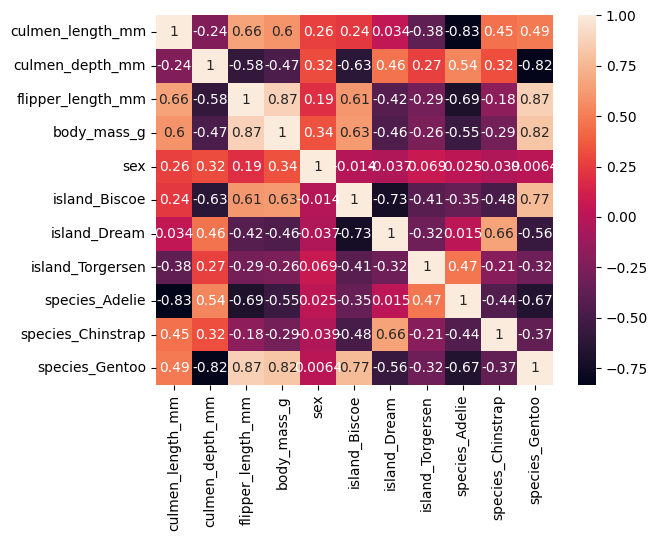

In [44]:
sns.heatmap(df1.corr(),annot=True)

# x and y Split

In [45]:
df1.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,island_Biscoe,island_Dream,island_Torgersen,species_Adelie,species_Chinstrap,species_Gentoo
0,39.10000,18.70000,181.000000,3750.000000,2,0,0,1,1,0,0
1,39.50000,17.40000,186.000000,3800.000000,1,0,0,1,1,0,0
2,40.30000,18.00000,195.000000,3250.000000,1,0,0,1,1,0,0
3,43.92193,17.15117,200.915205,4201.754386,3,0,0,1,1,0,0
4,36.70000,19.30000,193.000000,3450.000000,1,0,0,1,1,0,0


In [54]:
x=df1.drop(columns='sex',axis=True)
x.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,species_Adelie,species_Chinstrap,species_Gentoo
0,39.10000,18.70000,181.000000,3750.000000,0,0,1,1,0,0
1,39.50000,17.40000,186.000000,3800.000000,0,0,1,1,0,0
2,40.30000,18.00000,195.000000,3250.000000,0,0,1,1,0,0
3,43.92193,17.15117,200.915205,4201.754386,0,0,1,1,0,0
4,36.70000,19.30000,193.000000,3450.000000,0,0,1,1,0,0


In [56]:
y=df1.sex
y.head()

0    2
1    1
2    1
3    3
4    1
Name: sex, dtype: int64

# Scaling the data

In [57]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()

In [58]:
x_scaled=pd.DataFrame(ms.fit_transform(x),columns=x.columns)
x_scaled.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,species_Adelie,species_Chinstrap,species_Gentoo
0,0.254545,0.666667,0.152542,0.291667,0.0,0.0,1.0,1.0,0.0,0.0
1,0.269091,0.511905,0.237288,0.305556,0.0,0.0,1.0,1.0,0.0,0.0
2,0.298182,0.583333,0.389831,0.152778,0.0,0.0,1.0,1.0,0.0,0.0
3,0.429888,0.482282,0.490088,0.417154,0.0,0.0,1.0,1.0,0.0,0.0
4,0.167273,0.738095,0.355932,0.208333,0.0,0.0,1.0,1.0,0.0,0.0


# Performing train test split

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=True)

In [60]:
x_train.shape

(275, 10)

In [61]:
x_test.shape

(69, 10)